### Viewers of the advertisement
In this project,advertisement dataset is explored indicating whether or not a particular internet user clicked on an advertisement of a company website. Model is created that will predict whether or not they will click on an ad based off the features of that user.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import the dataset

In [2]:
ad=pd.read_csv('advertising.csv')

In [3]:
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### Exploratory Data analysis

Text(0.5, 0, 'Age')

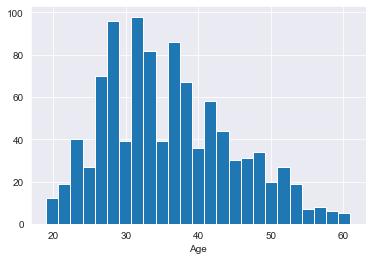

In [7]:
sns.set_style('dark')
ad['Age'].hist(bins=25)
plt.xlabel('Age')

Jointplot showing Area income versus age

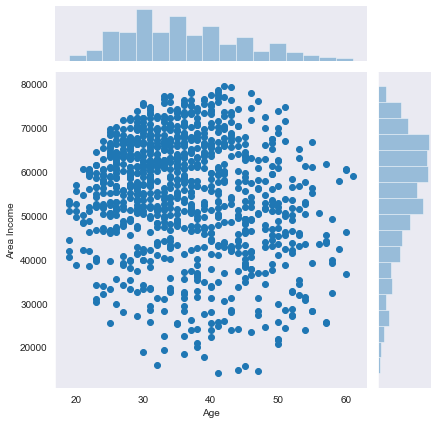

In [8]:
sns.jointplot(x='Age',y='Area Income',data=ad)

Jointplot showing the kde distributions of Daily Time spent on site vs. Age.

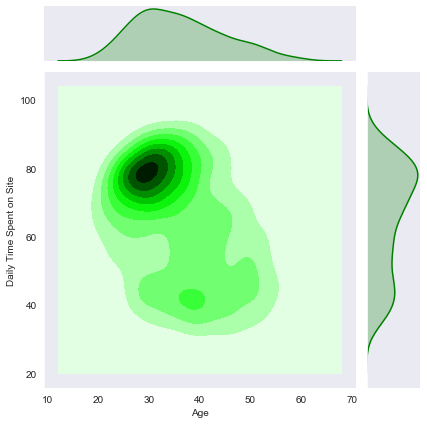

In [10]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad,color='green',kind='kde');

### Logistic Regression

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x=ad[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y=ad['Clicked on Ad']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=100)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Prediction and evaluation

In [17]:
predict= logmodel.predict(x_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       166
           1       0.94      0.86      0.90       184

    accuracy                           0.90       350
   macro avg       0.90      0.90      0.90       350
weighted avg       0.90      0.90      0.90       350



In [21]:
print(confusion_matrix(y_test,predictions))

[[156  10]
 [ 26 158]]
